# PCA and online learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import genfromtxt
from numpy import linalg as LA

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

datax = dfx.as_matrix(columns=None)
datay = dfy.as_matrix(columns=None)

In [3]:
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

In [4]:
datax_train_cov = np.cov(datax_train,rowvar=False)
datax_train_cov

array([[  2.86299585e+04,  -6.24420735e+01,  -7.60029964e+03, ...,
          1.64098568e+00,   6.54742786e-01,  -5.70089318e-02],
       [ -6.24420735e+01,   4.18129612e+00,   9.89294893e+00, ...,
          2.11930336e-03,  -5.98025633e-02,   2.19633193e-02],
       [ -7.60029964e+03,   9.89294893e+00,   2.22327831e+05, ...,
          3.76238427e+00,   9.19257015e-01,   1.81347775e+00],
       ..., 
       [  1.64098568e+00,   2.11930336e-03,   3.76238427e+00, ...,
          6.98118388e-02,  -1.25288112e-02,   2.60799830e-02],
       [  6.54742786e-01,  -5.98025633e-02,   9.19257015e-01, ...,
         -1.25288112e-02,   3.58526617e-02,  -1.75878765e-02],
       [ -5.70089318e-02,   2.19633193e-02,   1.81347775e+00, ...,
          2.60799830e-02,  -1.75878765e-02,   5.11680417e-02]])

In [5]:
data_eigvals, data_eigvecs = np.linalg.eig(datax_train_cov)
data_eigvals

array([  6.55575831e+10,   1.10935997e+10,   2.65462044e+09,
         2.37130930e+09,   3.97546184e+08,   4.99705756e+07,
         2.31316833e+07,   9.02267925e+06,   1.18608234e+06,
         2.37062861e+05,   2.11357317e+05,   4.36047828e+04,
         1.40121503e+04,   1.66158936e+03,   1.02362747e+02,
         5.55785247e+01,   1.58677831e+01,   1.20465593e+01,
         3.97972431e+00,   2.61544736e+00,   3.42646241e-01,
         2.49859730e-01,   2.19609248e-01,   1.94436124e-01,
         1.83606361e-01,   1.87245367e-01,   1.85524224e-01,
         1.69840795e-01,   1.53902019e-01,   1.48386381e-01,
         8.54691129e-02,   8.00073610e-02,   6.65264801e-02,
         6.51966018e-02,   5.69659643e-02,   5.45707201e-02,
         4.60500506e-02,   2.79991623e-02,   2.62731557e-02,
         2.40030416e-02,   2.29816805e-02,   1.96999496e-02,
         1.59505160e-02,   1.26824070e-02,   1.03540823e-02,
         7.17659207e-03,   5.79900252e-03,   4.75672470e-03,
         2.48825294e-03,

In [6]:
data_eigvecs

array([[ -4.65834329e-04,   4.14575430e-06,  -5.09082626e-05, ...,
          3.85765963e-16,   5.70815856e-14,   5.31074298e-14],
       [  7.98058575e-07,   5.56902346e-07,   1.50247625e-07, ...,
          2.23843949e-15,   4.80994580e-13,   4.47404985e-13],
       [  8.51528377e-05,  -5.67052785e-04,   6.03909110e-05, ...,
          3.74183398e-19,  -5.69907064e-18,  -5.28512172e-18],
       ..., 
       [ -2.84708072e-08,   2.23084208e-08,  -2.38969395e-09, ...,
         -4.91462167e-15,  -4.68772423e-13,  -4.36582988e-13],
       [ -1.10206399e-08,  -1.63459321e-08,   3.33094049e-09, ...,
         -1.07991910e-14,  -2.47653662e-13,  -2.31357901e-13],
       [  5.26094895e-10,   1.09159972e-07,   1.15278095e-08, ...,
         -1.82285962e-15,   3.78467962e-14,   3.51492048e-14]])

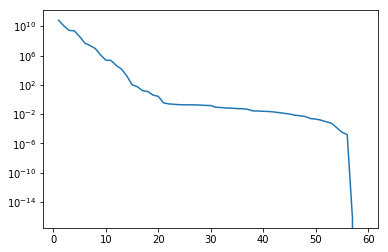

In [7]:
nums = np.arange(1,data_eigvals.size+1)
plt.plot(nums, np.sort(data_eigvals)[::-1])
plt.yscale('log')
plt.show()

In [8]:
first_index = data_eigvals.argsort()[-1:][::-1]
last_index = data_eigvals.argsort()[-20:-19][::-1]
matrix_A = data_eigvecs[:,:20]
#matrix_A = np.transpose(matrix_A)
matrix_A

array([[ -4.65834329e-04,   4.14575430e-06,  -5.09082626e-05, ...,
         -1.33464814e-03,   2.71735271e-03,   7.98497720e-04],
       [  7.98058575e-07,   5.56902346e-07,   1.50247625e-07, ...,
          2.07768692e-02,   9.96771230e-01,  -4.49261605e-02],
       [  8.51528377e-05,  -5.67052785e-04,   6.03909110e-05, ...,
         -7.22740650e-04,   5.14603538e-06,  -4.90140954e-06],
       ..., 
       [ -2.84708072e-08,   2.23084208e-08,  -2.38969395e-09, ...,
          4.07553864e-05,   1.92182182e-03,   4.20994200e-03],
       [ -1.10206399e-08,  -1.63459321e-08,   3.33094049e-09, ...,
          3.77269667e-04,  -1.48350301e-02,  -9.30670943e-04],
       [  5.26094895e-10,   1.09159972e-07,   1.15278095e-08, ...,
         -2.40745078e-03,   6.41005383e-03,   2.65427943e-03]])

In [9]:
data_PCA = np.dot(datax_train,matrix_A )
data_PCA.shape

(29733, 20)

## Online learning with static expert

In [10]:
t=1
pt = np.ones(data_PCA.shape[1])/data_PCA.shape[1]
b=0.000000001
#b=0.000000001
steps = data_PCA.shape[0]
#steps = 20000
iterLoss = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(data_PCA[j,:] , pt))-datay_train[j])
    for i in range(0,data_PCA.shape[1]):
        loss = np.square(data_PCA[j,i]-datay_train[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)
lt = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    if j == 0:
        lt[j] = iterLoss[0]
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)

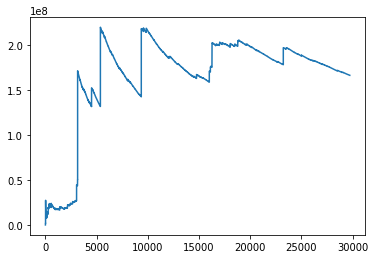

In [11]:
plt.plot(lt)
plt.show()

In [22]:
matrix_A = data_eigvecs[:,:10]
#matrix_A = np.transpose(matrix_A)
data_PCA = np.dot(datax_train,matrix_A )

t=1
pt = np.ones(data_PCA.shape[1])/data_PCA.shape[1]
b=0.000000001
#b=0.000000001
steps = data_PCA.shape[0]
#steps = 20000
iterLoss = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(data_PCA[j,:] , pt))-datay_train[j])
    for i in range(0,data_PCA.shape[1]):
        loss = np.square(data_PCA[j,i]-datay_train[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)
lt = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    if j == 0:
        lt[j] = iterLoss[0]
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)

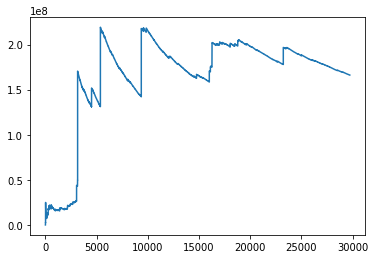

In [23]:
plt.plot(lt)
plt.show()

In [24]:
matrix_A = data_eigvecs[:,:5]
#matrix_A = np.transpose(matrix_A)
data_PCA = np.dot(datax_train,matrix_A )

t=1
pt = np.ones(data_PCA.shape[1])/data_PCA.shape[1]
b=0.000000001
#b=0.000000001
steps = data_PCA.shape[0]
#steps = 20000
iterLoss = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(data_PCA[j,:] , pt))-datay_train[j])
    for i in range(0,data_PCA.shape[1]):
        loss = np.square(data_PCA[j,i]-datay_train[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)
lt = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    if j == 0:
        lt[j] = iterLoss[0]
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)

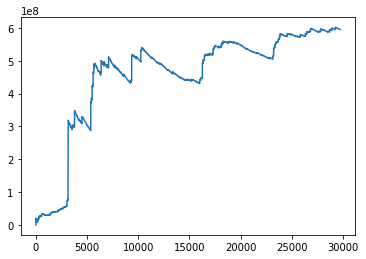

In [25]:
plt.plot(lt)
plt.show()

In [27]:
matrix_A = data_eigvecs[:,:2]
#matrix_A = np.transpose(matrix_A)
data_PCA = np.dot(datax_train,matrix_A )

t=1
pt = np.ones(data_PCA.shape[1])/data_PCA.shape[1]
b=0.000000001
#b=0.000000001
steps = data_PCA.shape[0]
#steps = 20000
iterLoss = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(data_PCA[j,:] , pt))-datay_train[j])
    for i in range(0,data_PCA.shape[1]):
        loss = np.square(data_PCA[j,i]-datay_train[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)
lt = np.zeros(data_PCA.shape[0])
for j in range(0,steps):
    if j == 0:
        lt[j] = iterLoss[0]
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)

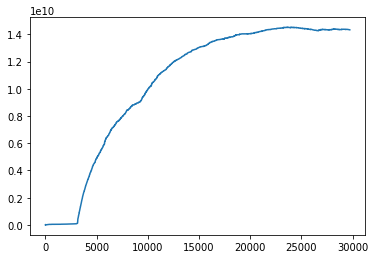

In [28]:
plt.plot(lt)
plt.show()

In [29]:
lt

array([  3.20485697e+05,   1.60242848e+05,   2.75444698e+05, ...,
         1.43364528e+10,   1.43360578e+10,   1.43355793e+10])

In [30]:
lt[0]

320485.69655027939

## Bad attempt